In [17]:
# ============================================================================
# Import Libraries
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [18]:
# ============================================================================
# Setup Paths
# ============================================================================

# Dataset paths
DATA_DIR = 'data'
IMAGES_DIR = 'data/Images'
CAPTIONS_FILE = 'data/captions.txt'

# Verify paths exist
if not os.path.exists(DATA_DIR):
    print(f"Error: Directory '{DATA_DIR}' not found!")
    print("Please download Flickr 8k dataset and place it in 'data/' folder")
else:
    print(f"Data directory found: {DATA_DIR}")
    
if not os.path.exists(IMAGES_DIR):
    print(f"Error: Images directory '{IMAGES_DIR}' not found!")
else:
    num_images = len([f for f in os.listdir(IMAGES_DIR) if f.endswith(('.jpg', '.jpeg', '.png'))])
    print(f"Images directory found: {num_images} images")
    
if not os.path.exists(CAPTIONS_FILE):
    print(f"Error: Captions file '{CAPTIONS_FILE}' not found!")
else:
    print(f"Captions file found: {CAPTIONS_FILE}")

Data directory found: data
Images directory found: 8091 images
Captions file found: data/captions.txt


In [19]:
# ============================================================================
# Load Dataset
# ============================================================================
print("Loading dataset")

# Load captions
df = pd.read_csv(CAPTIONS_FILE)

# Basic info
print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total rows (captions): {len(df)}")
print(f"Unique images: {df['image'].nunique()}")
print(f"Captions per image: {len(df) / df['image'].nunique():.1f}")
print(f"Dataset shape: {df.shape}")

# Display first few rows
print("\n" + "="*60)
print("SAMPLE DATA")
print("="*60)
print(df.head(10))

# Column info
print("\n" + "="*60)
print("COLUMN INFORMATION")
print("="*60)
print(df.info())

Loading dataset

DATASET OVERVIEW
Total rows (captions): 40455
Unique images: 8091
Captions per image: 5.0
Dataset shape: (40455, 2)

SAMPLE DATA
                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   
5  1001773457_577c3a7d70.jpg   
6  1001773457_577c3a7d70.jpg   
7  1001773457_577c3a7d70.jpg   
8  1001773457_577c3a7d70.jpg   
9  1001773457_577c3a7d70.jpg   

                                             caption  
0  Seorang anak dengan gaun merah muda sedang men...  
1       Seorang gadis pergi ke sebuah bangunan kayu.  
2  Seorang gadis kecil memanjat ke sebuah rumah b...  
3  Seorang gadis kecil menaiki tangga ke rumah be...  
4  Seorang gadis kecil dengan gaun merah muda mas...  
5  Seekor anjing hitam dan anjing berbintik berke...  
6  Seekor anjing hitam dan anjing tiga warna berm...  
7  Seekor anjing hitam dan anjing putih dengan bi...  
8  Dua

In [20]:
# ============================================================================
# Check for Missing Data
# ============================================================================
print("="*60)
print("MISSING DATA CHECK")
print("="*60)

missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("No missing data found!")
else:
    print(f"Found {missing.sum()} missing values")

MISSING DATA CHECK
image      0
caption    0
dtype: int64
No missing data found!


In [21]:
# ============================================================================
# Caption Statistics
# ============================================================================
print("\n" + "="*60)
print("CAPTION STATISTICS")
print("="*60)

# Add caption length (word count)
df['caption_length'] = df['caption'].apply(lambda x: len(str(x).split()))

# Basic statistics
print("\nCaption Length Statistics:")
print(f"Mean length: {df['caption_length'].mean():.2f} words")
print(f"Median length: {df['caption_length'].median():.0f} words")
print(f"Min length: {df['caption_length'].min()} words")
print(f"Max length: {df['caption_length'].max()} words")
print(f"Std deviation: {df['caption_length'].std():.2f} words")

print("\nCaption Length Distribution:")
print(df['caption_length'].describe())


CAPTION STATISTICS

Caption Length Statistics:
Mean length: 9.15 words
Median length: 9 words
Min length: 1 words
Max length: 31 words
Std deviation: 3.26 words

Caption Length Distribution:
count    40455.000000
mean         9.147398
std          3.264142
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         31.000000
Name: caption_length, dtype: float64


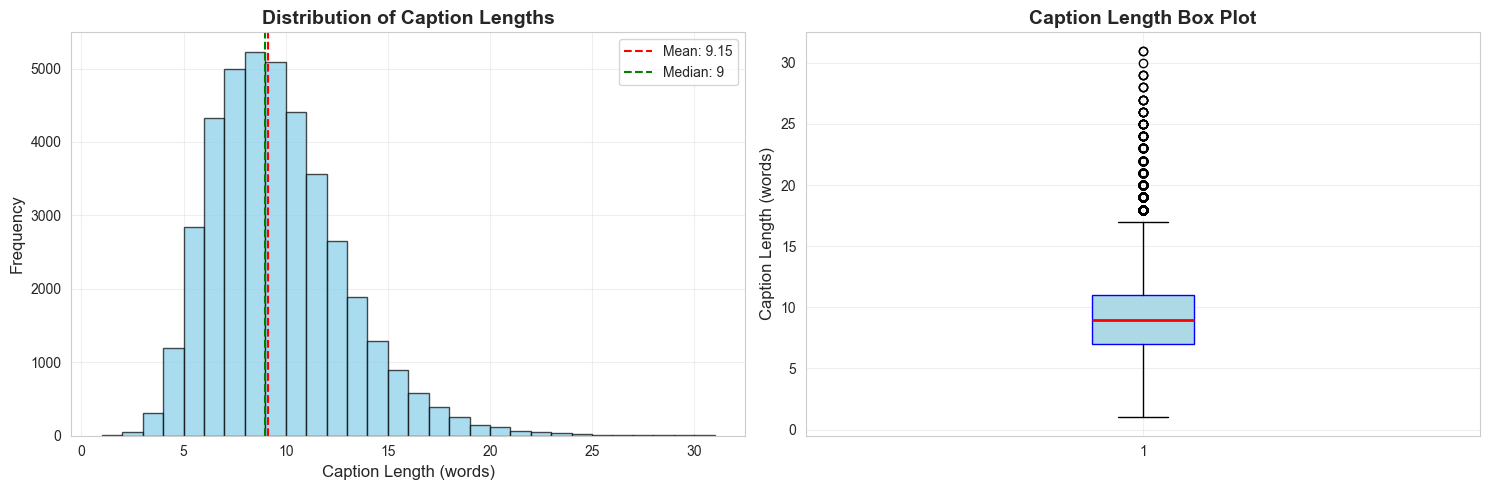

In [ ]:
# ============================================================================
# Visualize Caption Length Distribution
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['caption_length'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(df['caption_length'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["caption_length"].mean():.2f}')
axes[0].axvline(df['caption_length'].median(), color='green', linestyle='--', 
                label=f'Median: {df["caption_length"].median():.0f}')
axes[0].set_xlabel('Caption Length (words)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Caption Lengths', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['caption_length'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Caption Length (words)', fontsize=12)
axes[1].set_title('Caption Length Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# ============================================================================
# Word Frequency Analysis
# ============================================================================
print("\n" + "="*60)
print("WORD FREQUENCY ANALYSIS")
print("="*60)

# Collect all words
all_words = []
for caption in df['caption']:
    words = str(caption).lower().split()
    all_words.extend(words)

# Count word frequency
word_freq = Counter(all_words)

print(f"\nTotal words (with repetition): {len(all_words)}")
print(f"Unique words (vocabulary): {len(word_freq)}")

# Most common words
print("\nTop 20 Most Common Words:")
print("="*40)
for word, count in word_freq.most_common(20):
    print(f"{word:15s} : {count:5d} times")


WORD FREQUENCY ANALYSIS

Total words (with repetition): 370058
Unique words (vocabulary): 10410

Top 20 Most Common Words:
di              : 27797 times
seorang         : 16308 times
dengan          : 10988 times
anjing          : 10000 times
dan             :  8719 times
pria            :  7283 times
anak            :  6845 times
dua             :  5568 times
seekor          :  5233 times
wanita          :  4285 times
gadis           :  3953 times
orang           :  3849 times
hitam           :  3732 times
yang            :  3561 times
putih           :  3345 times
bermain         :  3260 times
berjalan        :  3250 times
berdiri         :  3096 times
kecil           :  3040 times
dalam           :  2945 times


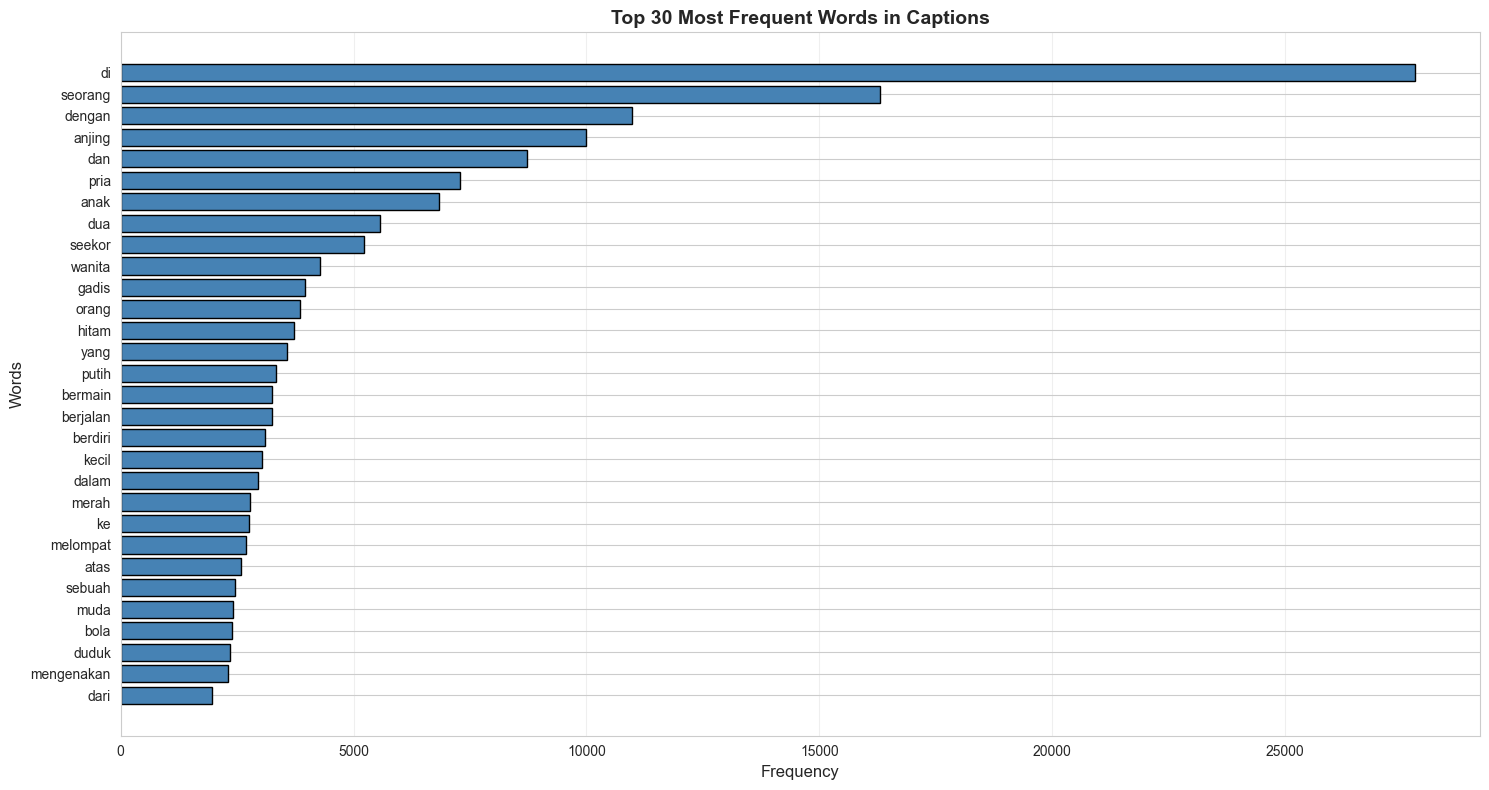

In [24]:
# ============================================================================
# Visualize Top Words
# ============================================================================
# Get top 30 words
top_words = dict(word_freq.most_common(30))
words = list(top_words.keys())
counts = list(top_words.values())

# Plot
plt.figure(figsize=(15, 8))
plt.barh(words, counts, color='steelblue', edgecolor='black')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 30 Most Frequent Words in Captions', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# ============================================================================
# Analyze Word Frequency Distribution
# ============================================================================
# Count how many words appear N times
freq_distribution = Counter(word_freq.values())

print("\n" + "="*60)
print("WORD FREQUENCY DISTRIBUTION")
print("="*60)
print("\nHow many words appear N times:")
for freq in sorted(freq_distribution.keys())[:10]:
    print(f"Appear {freq:3d} time(s): {freq_distribution[freq]:5d} words")

# Words appearing only once
rare_words = [word for word, count in word_freq.items() if count == 1]
print(f"\nWords appearing only once: {len(rare_words)}")
print(f"Percentage: {len(rare_words)/len(word_freq)*100:.2f}%")

# Words appearing less than 5 times
very_rare_words = [word for word, count in word_freq.items() if count < 5]
print(f"\nWords appearing < 5 times: {len(very_rare_words)}")
print(f"Percentage: {len(very_rare_words)/len(word_freq)*100:.2f}%")


WORD FREQUENCY DISTRIBUTION

How many words appear N times:
Appear   1 time(s):  4590 words
Appear   2 time(s):  1383 words
Appear   3 time(s):   738 words
Appear   4 time(s):   512 words
Appear   5 time(s):   356 words
Appear   6 time(s):   287 words
Appear   7 time(s):   207 words
Appear   8 time(s):   162 words
Appear   9 time(s):   146 words
Appear  10 time(s):   118 words

Words appearing only once: 4590
Percentage: 44.09%

Words appearing < 5 times: 7223
Percentage: 69.39%



VISUALIZING SAMPLE IMAGES WITH CAPTIONS


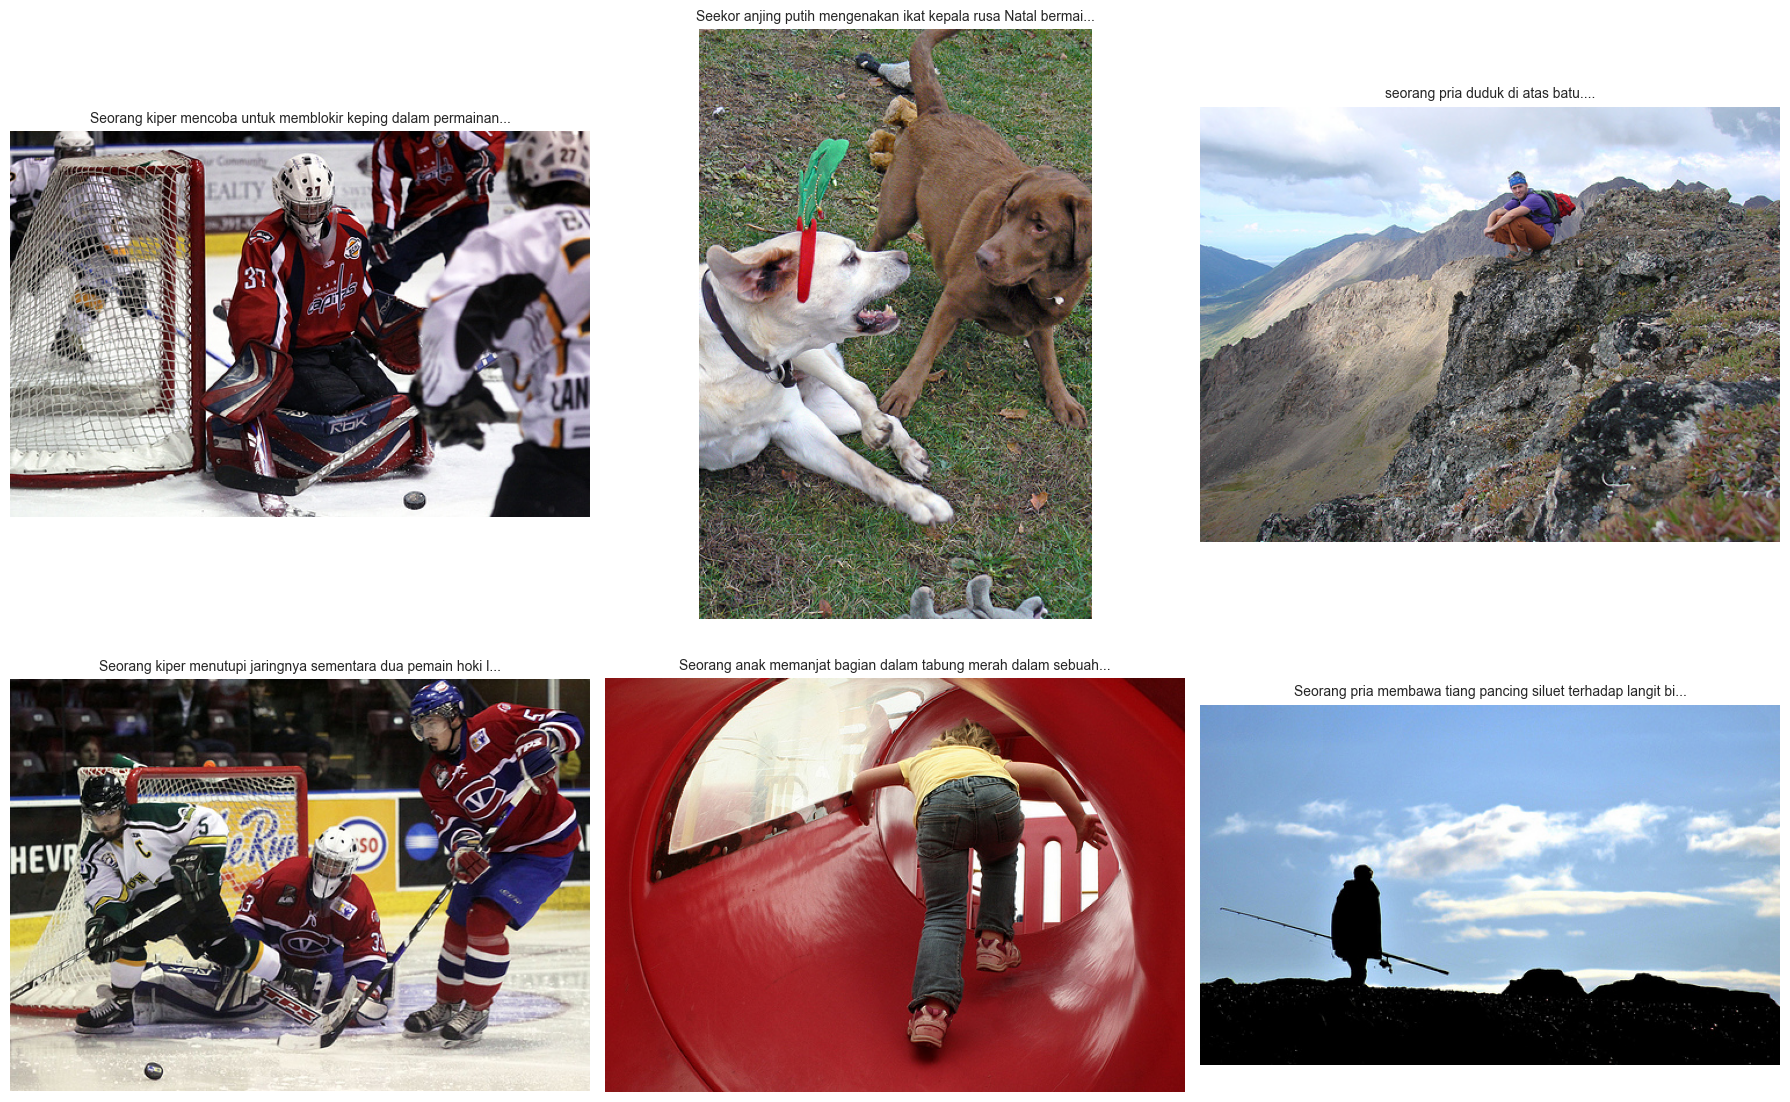

In [26]:
# ============================================================================
# Sample Images Visualization
# ============================================================================
print("\n" + "="*60)
print("VISUALIZING SAMPLE IMAGES WITH CAPTIONS")
print("="*60)

# Select random images
import random
random.seed(42)
sample_images = random.sample(df['image'].unique().tolist(), 6)

# Create subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, img_name in enumerate(sample_images):
    # Load image
    img_path = os.path.join(IMAGES_DIR, img_name)
    img = Image.open(img_path)
    
    # Get one caption for this image
    caption = df[df['image'] == img_name]['caption'].values[0]
    
    # Display
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f"{caption[:60]}...", fontsize=10, wrap=True)

plt.tight_layout()
plt.show()


MULTIPLE CAPTIONS FOR SINGLE IMAGE
Image: 1000268201_693b08cb0e.jpg
All 5 captions:

1. Seorang anak dengan gaun merah muda sedang menaiki seperangkat tangga dengan jalan masuk.
2. Seorang gadis pergi ke sebuah bangunan kayu.
3. Seorang gadis kecil memanjat ke sebuah rumah bermain kayu.
4. Seorang gadis kecil menaiki tangga ke rumah bermainnya.
5. Seorang gadis kecil dengan gaun merah muda masuk ke kabin kayu.


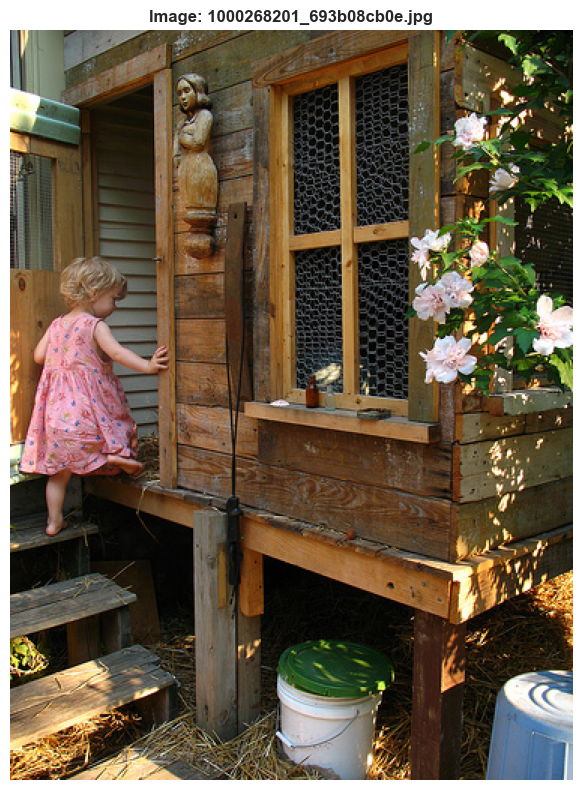

In [27]:
# ============================================================================
# Detailed View - Multiple Captions per Image
# ============================================================================
print("\n" + "="*60)
print("MULTIPLE CAPTIONS FOR SINGLE IMAGE")
print("="*60)

# Select one image
sample_img = df['image'].iloc[0]
sample_captions = df[df['image'] == sample_img]['caption'].values

print(f"Image: {sample_img}")
print(f"All {len(sample_captions)} captions:\n")

for i, caption in enumerate(sample_captions, 1):
    print(f"{i}. {caption}")

# Display the image
img_path = os.path.join(IMAGES_DIR, sample_img)
img = Image.open(img_path)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title(f"Image: {sample_img}", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


In [28]:
# ============================================================================
# Image Dimension Analysis
# ============================================================================
print("\n" + "="*60)
print("IMAGE DIMENSION ANALYSIS")
print("="*60)

# Sample 1000 images to check dimensions (faster)
sample_img_list = random.sample(os.listdir(IMAGES_DIR), min(1000, len(os.listdir(IMAGES_DIR))))

widths = []
heights = []

print("Analyzing image dimensions (sample of 1000 images)...")

for img_name in sample_img_list:
    if img_name.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(IMAGES_DIR, img_name)
        try:
            img = Image.open(img_path)
            widths.append(img.width)
            heights.append(img.height)
        except:
            pass

print(f"\nAnalyzed {len(widths)} images")
print(f"Width  - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.0f}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.0f}")


IMAGE DIMENSION ANALYSIS
Analyzing image dimensions (sample of 1000 images)...

Analyzed 1000 images
Width  - Min: 164, Max: 500, Mean: 459
Height - Min: 127, Max: 500, Mean: 398


In [29]:
# ============================================================================
# Summary Statistics
# ============================================================================
print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)

summary = {
    'Total Images': df['image'].nunique(),
    'Total Captions': len(df),
    'Captions per Image': len(df) / df['image'].nunique(),
    'Unique Words (Vocabulary)': len(word_freq),
    'Total Words': len(all_words),
    'Avg Caption Length': df['caption_length'].mean(),
    'Min Caption Length': df['caption_length'].min(),
    'Max Caption Length': df['caption_length'].max(),
    'Words appearing once': len(rare_words),
    'Words appearing < 5 times': len(very_rare_words)
}

for key, value in summary.items():
    if isinstance(value, float):
        print(f"{key:30s}: {value:.2f}")
    else:
        print(f"{key:30s}: {value}")

print("\n" + "="*60)
print("DATA EXPLORATION COMPLETED!")
print("="*60)


DATASET SUMMARY
Total Images                  : 8091
Total Captions                : 40455
Captions per Image            : 5.00
Unique Words (Vocabulary)     : 10410
Total Words                   : 370058
Avg Caption Length            : 9.15
Min Caption Length            : 1
Max Caption Length            : 31
Words appearing once          : 4590
Words appearing < 5 times     : 7223

DATA EXPLORATION COMPLETED!
